https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ja#%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%A2%E3%83%87%E3%83%AB%E3%82%92%E6%A7%8B%E7%AF%89%E3%81%99%E3%82%8B

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(f'TensorFlow version: {tf.__version__}')

TensorFlow version: 2.17.0


In [2]:
# data set -> x_train, y_train, x_test, y_test -> normalize
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

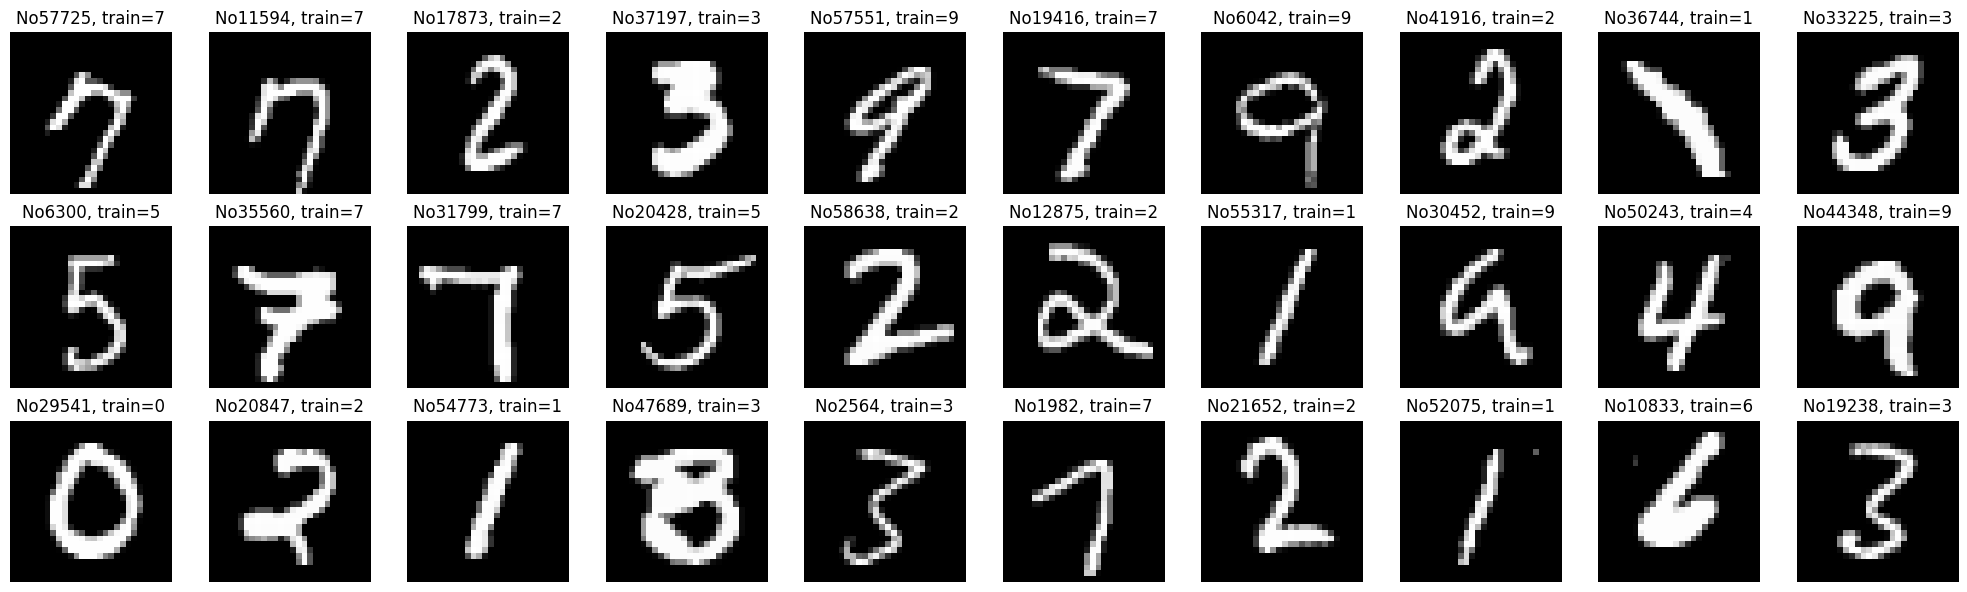

In [3]:
# train data display
row, col = 3, 10
fig, axs = plt.subplots(row, col, figsize=(col*2, row*2))
for i in range(row):
    for j in range(col):
        num = np.random.randint(0, y_train.shape[0])
        axs[i, j].imshow(x_train[num], cmap="gray")
        axs[i, j].set_title(f'No{num}, train={y_train[num]}')
        axs[i, j].axis("off")
plt.tight_layout()
plt.show()

- 損失関数
  - one-hot 表現でラベルが作成されている場合は CategoricalCrossentropy を利用
  - 整数でラベルが作成されている場合は、SparseCategoricalCrossentropy を利用
    - クロスエントロピー誤差
    $$ E = - \sum_k t_k \log y_k $$


In [4]:
BATCH_SIZE = 2**7
EPOCHS = 5

CSV_FILE_PATH = "tensorflow_test_00.csv"
MODEL_FILE_PATH = 'tensorflow_test_00.keras'

In [5]:
# CNN
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10),
    ]
)
# model.summary()

# 損失関数
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# モデルの構成とコンパイル
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
# callbacks
callbacks = [tf.keras.callbacks.CSVLogger(CSV_FILE_PATH)]
# トレーニングと評価
history = model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=callbacks,
)
# モデル保存
model.save(MODEL_FILE_PATH)

c:\Users\JY810251\python\blow_prediction\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8045 - loss: 0.6788 - val_accuracy: 0.9432 - val_loss: 0.1964
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9395 - loss: 0.2082 - val_accuracy: 0.9595 - val_loss: 0.1366
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9557 - loss: 0.1528 - val_accuracy: 0.9672 - val_loss: 0.1121
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9644 - loss: 0.1236 - val_accuracy: 0.9713 - val_loss: 0.0967
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9694 - loss: 0.1041 - val_accuracy: 0.9729 - val_loss: 0.0901


- accuracy : トレーニングデータに対する精度
- loss : トレーニングデータに対する損失
- val_accuracy : 検証データに対する正解率
- val_loss : 検証データに対する損失

In [6]:
# for k, v in history.history.items():
#     print(k, v)

In [7]:
# # 学習済みモデルの評価 history['val_accuracy'], history['val_loss'] と同じ
# test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [8]:
df = pd.read_csv(CSV_FILE_PATH)
df.tail(3)

,epoch,accuracy,loss,val_accuracy,val_loss
2,2,0.957983,0.145359,0.9672,0.112106
3,3,0.965083,0.120947,0.9713,0.096670
4,4,0.969267,0.103239,0.9729,0.090099


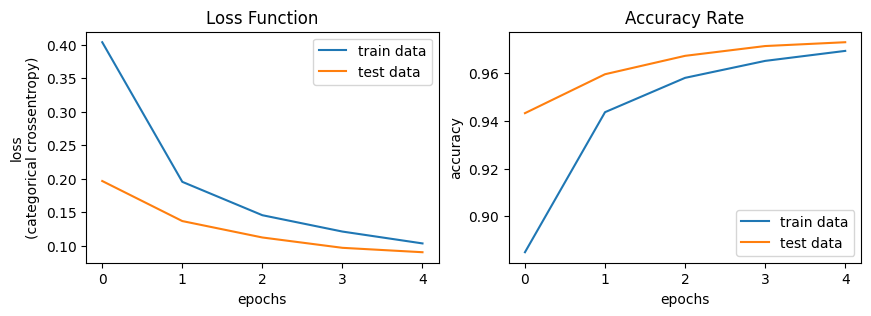

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].plot(df['epoch'], df['loss'], label="train data")
axs[0].plot(df['epoch'], df['val_loss'], label="test data")
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("loss\n(categorical crossentropy)")
axs[0].set_title('Loss Function')
axs[0].legend(loc="upper right")

axs[1].plot(df['epoch'], df['accuracy'], label="train data")
axs[1].plot(df['epoch'], df['val_accuracy'], label="test data")
axs[1].set_xlabel("epochs")
axs[1].set_ylabel("accuracy")
axs[1].set_title('Accuracy Rate')
axs[1].legend(loc="lower right")

plt.show()

In [10]:
# 確率に変換
pd.options.display.float_format = '{:.05f}'.format
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
df_prob = pd.DataFrame(probability_model(x_test))
df_prob['prob'] = df_prob.iloc[:, 0:10].idxmax(axis=1)
df_prob['y_test'] = y_test
df_prob.head(3)

,0,1,2,3,4,5,6,7,8,9,prob,y_test
0,0.00000,0.00000,0.00004,0.00082,0.00000,0.00000,0.00000,0.99909,0.00000,0.00003,7,7
1,0.00000,0.00037,0.99944,0.00012,0.00000,0.00004,0.00001,0.00000,0.00001,0.00000,2,2
2,0.00001,0.99507,0.00111,0.00024,0.00026,0.00025,0.00011,0.00249,0.00039,0.00007,1,1


In [11]:
# 予測が異なる数
df_prob[df_prob['prob'] != df_prob['y_test']].count()[0]

271

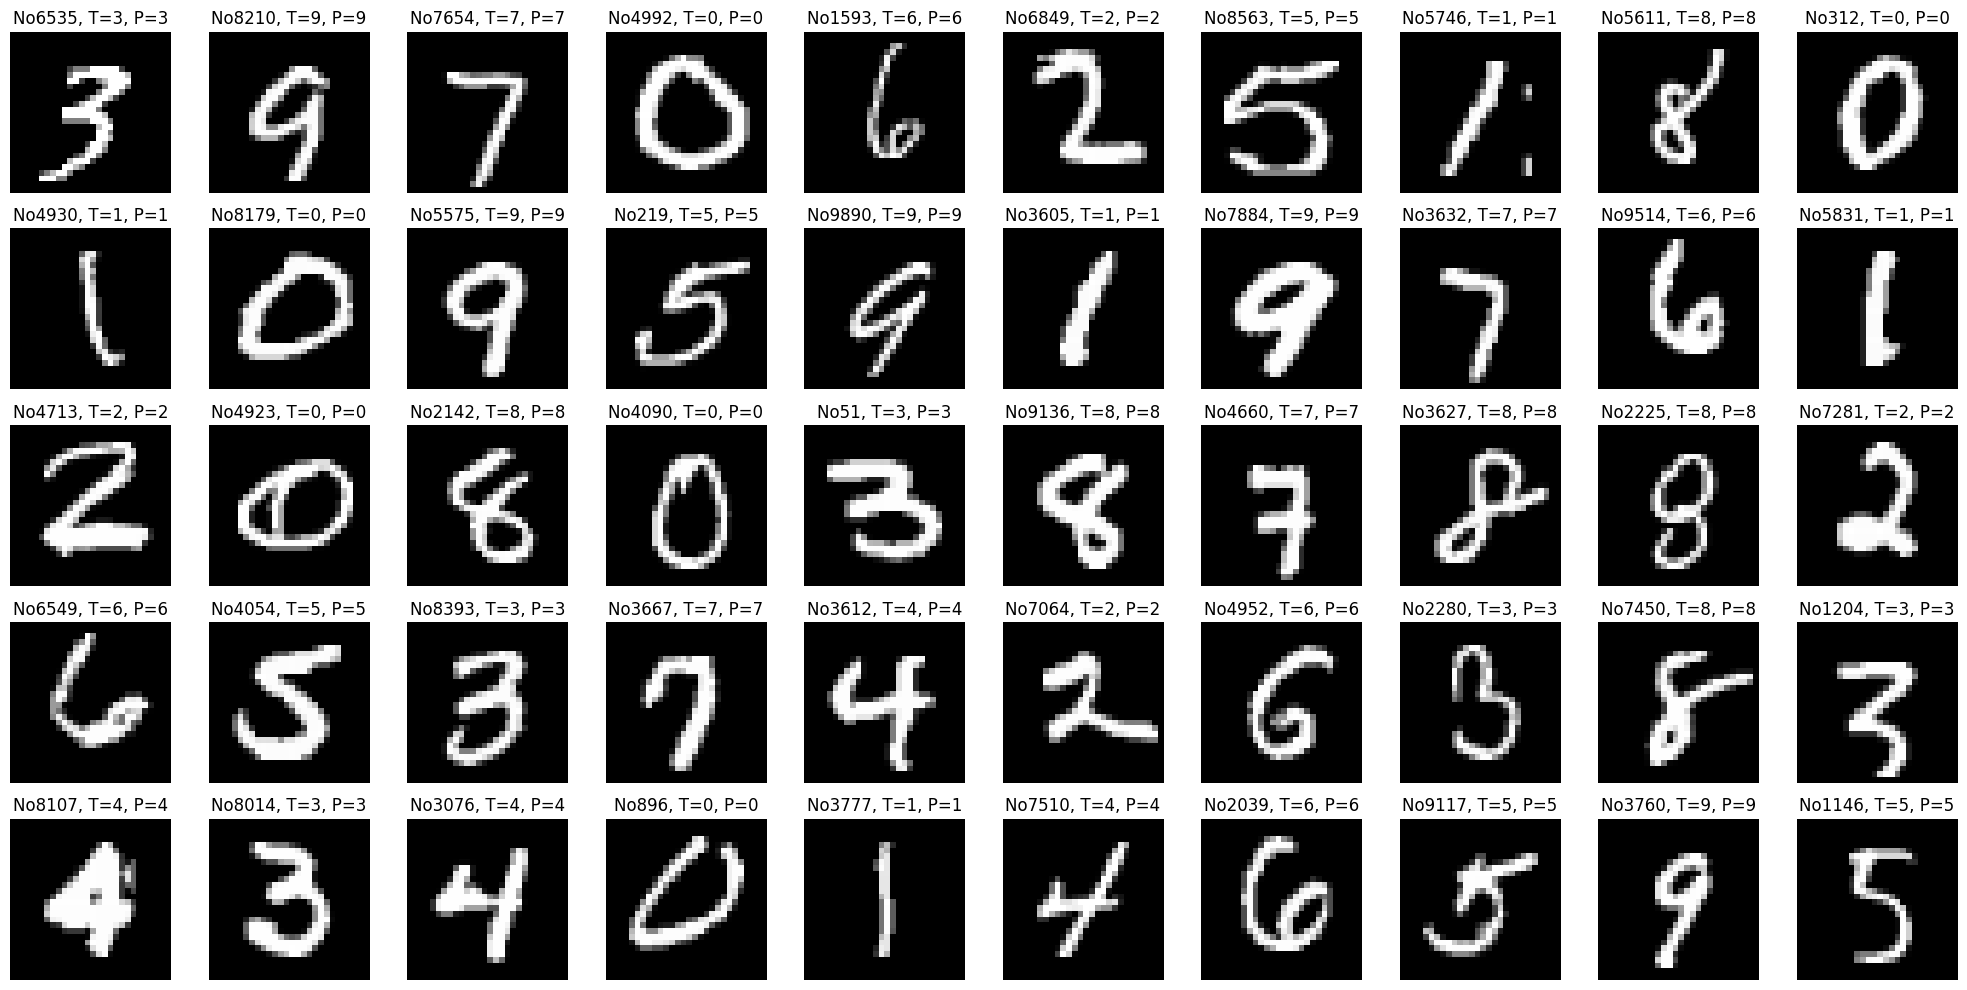

In [12]:
# 50枚ランダムに確認
row, col = 5, 10
fig, axs = plt.subplots(row, col, figsize=(col*2, row*2))
for i in range(row):
    for j in range(col):
        num = np.random.randint(10000)
        axs[i][j].imshow(x_test[num], cmap="gray")
        pred = df_prob.iloc[num, :-2].idxmax()
        y_ = y_test[num]
        axs[i][j].set_title(f'No{num}, T={y_}, P={pred}')
        if pred != y_:
            axs[i][j].set_title(f'No{num}, T={y_}, P={pred}', color='r')
        axs[i][j].axis('off')
plt.tight_layout()
plt.show()